In [2]:
########################################IMPORTS FOR READING IMAGES FROM A FOLDER ########################################
from pathlib import Path
import glob
import pandas as pd
import numpy as np
from PIL import Image
from resizeimage import resizeimage
import matplotlib as mp
import matplotlib.pyplot as plt
import cv2
import os

#######################################################General Imports######################################################
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.initializers import he_uniform
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import pydot
import pydotplus
from pydotplus import graphviz
from IPython.display import Image 
import os
import math
import h5py
import tkinter as tk
from tkinter import ttk
import re

In [68]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

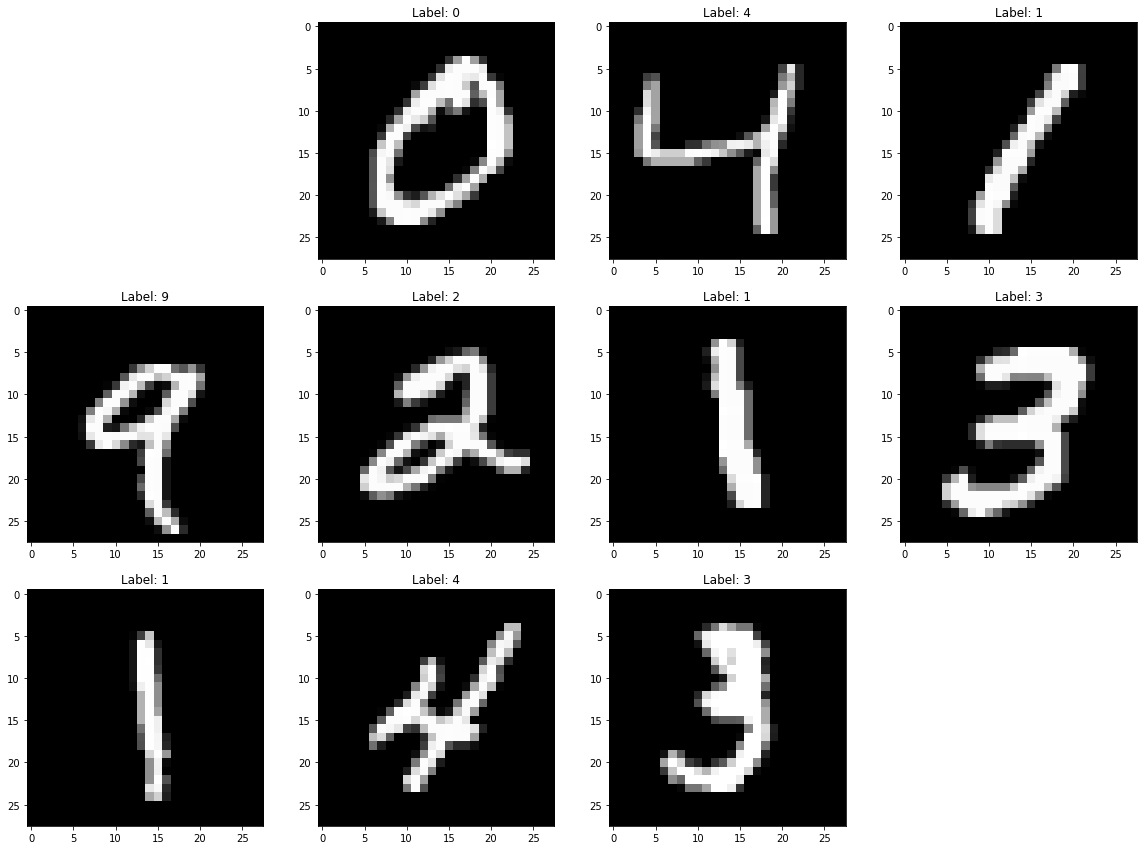

In [65]:
#Vizualizing First 10 Images
plt.figure(figsize=(20,20))
for i in range(10):
    i = i + 1
    plt.subplot(4,4,1+i)
    plt.title("Label: {}".format(y_train[i]))
    plt.imshow(x_train[i], cmap='gray')

In [69]:
#Create two datasets¶
#First having digits from 0 to 4
#Second having digits from 5 to 9

In [70]:
x_train_04 = x_train[y_train < 5]
y_train_04 = y_train[y_train < 5]
x_test_04  = x_test[y_test < 5]
y_test_04  = y_test[y_test < 5]

x_train_59 = x_train[y_train >= 5]
y_train_59 = y_train[y_train >= 5]
x_test_59  = x_test[y_test >= 5]
y_test_59  = y_test[y_test >= 5]


In [71]:
#Print shape of the data

In [38]:
x_train_04.shape

(30596, 28, 28)

In [39]:
x_test_04.shape

(5139, 28, 28)

In [ ]:
#Reshape data#############################################################

In [40]:
x_train_04 = x_train_04.reshape(x_train_04.shape[0], x_train_04.shape[1],x_train_04.shape[2],1)
x_test_04 = x_test_04.reshape(x_test_04.shape[0], x_test_04.shape[1],x_test_04.shape[2],1)

In [41]:
x_train_04.shape

(30596, 28, 28, 1)

In [43]:
x_test_04.shape

(5139, 28, 28, 1)

In [ ]:
#Normalize Data

In [44]:
x_train_04 = x_train_04.astype('float32')/255
x_test_04 = x_test_04.astype('float32')/255

In [45]:
#Here 30596 is the no of images
x_train_04.shape

(30596, 28, 28, 1)

In [46]:
x_test_04.shape

(5139, 28, 28, 1)

In [47]:
#No of Image is 
x_train_04.shape[0]

30596

In [48]:
x_test_04.shape[0]

5139

In [ ]:
#One-hot encode the class vector

In [52]:
y_train_04 = tf.keras.utils.to_categorical(y_train_04, num_classes=len(np.unique(y_train_04)))
y_test_04 = tf.keras.utils.to_categorical(y_test_04, num_classes= len(np.unique(y_test_04)))

In [53]:
y_train_04

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
#Initialize a sequential model¶
#define a sequential model
#add 2 convolutional layers
#no of filters: 32
#kernel size: 3x3
#activation: "relu"
#input shape: (28, 28, 1) for first layer
#add a max pooling layer of size 2x2
#add a dropout layer
#dropout layers fight with the overfitting by disregarding some of the neurons while training
#use dropout rate 0.2


#Add classification layers
#do this after doing question 6
#flatten the data
#add Flatten later
#flatten layers flatten 2D arrays to 1D array before building the fully connected layers
#add 2 dense layers
#number of neurons in first layer: 128
#number of neurons in last layer: number of classes
#activation function in first layer: relu
#activation function in last layer: softmax
#we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
#you can add a dropout layer in between, if necessary

In [54]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))     

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total para

In [ ]:
#Compile and fit the model

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [57]:
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath='r8_lab_ckpt', save_best_only=True, verbose=False)
training = model.fit(x_train_04, y_train_04, batch_size=128, nb_epoch=10, validation_data=(x_test_04, y_test_04),verbose=True, callbacks=[ckpt_callback])

Train on 30596 samples, validate on 5139 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
30596/30596 [==============================] - 38s 1ms/sample - loss: 0.1114 - acc: 0.9679 - val_loss: 0.0213 - val_acc: 0.9928
Epoch 2/10
30596/30596 [==============================] - 40s 1ms/sample - loss: 0.0273 - acc: 0.9912 - val_loss: 0.0111 - val_acc: 0.9969
Epoch 3/10
30596/30596 [==============================] - 41s 1ms/sample - loss: 0.0165 - acc: 0.9952 - val_loss: 0.0090 - val_acc: 0.9973
Epoch 4/10
30596/30596 [==============================] - 40s 1ms/sample - loss: 0.0112 - acc: 0.9967 - val_loss: 0.0073 - val_acc: 0.9973
Epoch 5/10
30596/30596 [==============================] - 40s 1ms/sample - loss: 0.0101 - acc: 0.9965 - val_loss: 0.0074 - val_acc: 0.9973
Epoch 6/10
30596/30596 [==============================] - 40s 1ms/sample - loss: 0.0060 - acc: 0.9982 - val_loss: 0.0075 - val_acc: 0.9975
Epoch 7/10
30596/30596 [==============================] - 40s 1ms/sam

In [58]:
model.load_weights('r8_lab_ckpt')
model.evaluate(x_test_04,y_test_04)

5139/5139 [==============================] - 2s 326us/sample - loss: 0.0058 - acc: 0.9977


[0.005763353696507844, 0.9976649]

In [59]:
#Just saved the model but not reloading it , as its already in memory in our case :)
model.save('base_model')

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total para

In [ ]:
#Transfer learning¶
#Now we will apply this model on second dataset (5-9 digits)

#fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
#get the second dataset
#train the last 2 dense layers
#predict the accuracy and loss

In [61]:
#Freezing all the Convolution Layers
for layer in model.layers:
    if('dense' not in layer.name):
        layer.trainable = False

In [64]:
for layer in model.layers:
    print(layer.trainable)

False
False
False
False
False
True
True


In [ ]:
#Modify Data
#Reshape data
#Normalize data


In [65]:
y_train_59 = y_train_59 - 5
y_test_59 = y_test_59 - 5

In [66]:
x_train_59 = x_train_59.reshape(x_train_59.shape[0], x_train_59.shape[1],x_train_59.shape[2],1)
x_test_59 = x_test_59.reshape(x_test_59.shape[0], x_test_59.shape[1],x_test_59.shape[2],1)

In [ ]:
#Print shape of data and number of images

In [67]:
x_train_59.shape

(29404, 28, 28, 1)

In [68]:
x_test_59.shape

(4861, 28, 28, 1)

In [69]:
x_train_59 = x_train_59.astype('float32')/255
x_test_59 = x_test_59.astype('float32')/255

In [70]:
#29404 is no of Images
x_train_59.shape

(29404, 28, 28, 1)

In [71]:
#4861 is no of Images
x_test_59.shape

(4861, 28, 28, 1)

In [ ]:
#One Hot Encode

In [73]:
y_train_59 = tf.keras.utils.to_categorical(y_train_59, num_classes=len(np.unique(y_train_59)))
y_test_59 = tf.keras.utils.to_categorical(y_test_59, num_classes= len(np.unique(y_test_59)))

In [76]:
y_train_59.shape

(29404, 5)

In [77]:
y_test_59.shape

(4861, 5)

In [ ]:
#Fit the model
#give train data - features and labels
#batch size: 128
#epochs: 10
#give validation data - features and labels


#Evaluate model¶
#evaluate your model and get accuracy
#use test features and labels

In [78]:
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath='r8_lab_ckpt_transfer', save_best_only=True, verbose=False)
training1 = model.fit(x_train_59, y_train_59, batch_size=128, nb_epoch=10, validation_data=(x_test_59, y_test_59),verbose=True, callbacks=[ckpt_callback])

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 41s 1ms/sample - loss: 0.1675 - acc: 0.9574 - val_loss: 0.0414 - val_acc: 0.9864
Epoch 2/10
29404/29404 [==============================] - 41s 1ms/sample - loss: 0.0340 - acc: 0.9885 - val_loss: 0.0263 - val_acc: 0.9918
Epoch 3/10
29404/29404 [==============================] - 41s 1ms/sample - loss: 0.0215 - acc: 0.9932 - val_loss: 0.0275 - val_acc: 0.9912
Epoch 4/10
29404/29404 [==============================] - 41s 1ms/sample - loss: 0.0150 - acc: 0.9947 - val_loss: 0.0248 - val_acc: 0.9922
Epoch 5/10
29404/29404 [==============================] - 41s 1ms/sample - loss: 0.0109 - acc: 0.9961 - val_loss: 0.0197 - val_acc: 0.9947TA: 2s - loss: 0.
Epoch 6/10
29404/29404 [==============================] - 40s 1ms/sample - loss: 0.0093 - acc: 0.9967 - val_loss: 0.0225 - val_acc: 0.9930
Epoch 7/10
29404/29404 [==============================] - 44s 1ms/sample - loss: 0.0069 - acc: 0.997

In [79]:
model.load_weights('r8_lab_ckpt_transfer')
model.evaluate(x_test_59,y_test_59)

4861/4861 [==============================] - 1s 299us/sample - loss: 0.0197 - acc: 0.9947


[0.01966019017436768, 0.9946513]

In [ ]:
#################################################Sentiment analysis########################################################

In [ ]:

#The objective of the second problem is to perform Sentiment analysis from the tweets 
#collected from the users targeted at various mobile devices.Based on the tweet posted 
#by a user (text), we will classify if the sentiment of the user targeted at a particular 
#mobile device is positive or not.

In [ ]:
#Read the data
#read tweets.csv
#use latin encoding if it gives encoding error while loading

In [3]:
df = pd.read_csv('tweets.csv', encoding= 'unicode_escape')

In [4]:
df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [6]:
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [7]:
#Drop null values
df.dropna(inplace=True)

In [8]:
#Now All Fine :)
df.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [9]:
#Preprocess data
#convert all text to lowercase - use .lower()
#select only numbers, alphabets, and #+_ from text - use re.sub()
#strip all the text - use .strip()
#this is for removing extra spaces

In [10]:
df = df.applymap(lambda s: s.lower())
df = df.applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))
df = df.applymap(lambda s: s.strip())

In [11]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


In [12]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [13]:
#This 
df[df.columns[2]].value_counts()

positive emotion                      2672
negative emotion                       519
no emotion toward brand or product      91
i cant tell                              9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [14]:
df = df[(df[df.columns[2]]=='negative emotion') | (df[df.columns[2]]=='positive emotion')]


In [15]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion
...,...,...,...
9077,mention your pr guy just convinced me to switc...,iphone,positive emotion
9079,quotpapyrussort of like the ipadquot nice lol...,ipad,positive emotion
9080,diller says google tv quotmight be run over by...,other google product or service,negative emotion
9085,ive always used camera+ for my iphone bc it ha...,ipad or iphone app,positive emotion


In [16]:
del(df[df.columns[1]])

In [17]:
#Encode labels
#in column "is_there_an_emotion_directed_at_a_brand_or_product"
#change "positive emotion" to 1
#change "negative emotion" to 0
#use map function to replace values

In [18]:
df[df.columns[1]] = df[df.columns[1]].apply(lambda x: 0 if(x == 'negative emotion') else 1)

In [19]:
#Create train and test data
#use train_test_split to get train and test set
#set a random_state
#test_size: 0.25

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[0]], df[df.columns[1]], random_state=42, test_size=0.25)

In [21]:
x_train.shape

(2393,)

In [22]:
x_test.shape

(798,)

In [23]:
y_train.shape

(2393,)

In [24]:
y_test.shape

(798,)

In [25]:
#Vectorize data
#create document-term matrix
#use CountVectorizer()
#ngram_range: (1, 2)
#stop_words: 'english'
#min_df: 2
#do fit_transform on X_train
#do transform on X_test

In [26]:
cv = CountVectorizer(ngram_range=(1,2),min_df=2)

In [27]:
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [147]:
model = LogisticRegression()
print(model)
model.fit(x_train, y_train)   
y_pred = model.predict(x_test)
print("___________________________________________________\n")
print("Confustion Matrix for y_test and y_pred :\t")
print("TN  FP")
print("FN  TP\n")
print(confusion_matrix(y_test, y_pred))
#print(pd.crosstab(y_test, y_pred))
print("\n")
print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
print("Precission = TP/(TP + FP)\n")
print("Recall = TP/(TP + FN)\n")
print("\n")
print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
print("Precision Score : {0}\n".format(precision_score(y_test,y_pred, average=None)))
print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred, average=None)))
print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred, average=None)))
print("___________________________________________________\n")
print("Classification Report :\n")
print(classification_report(y_test, y_pred))
print("___________________________________________________")        

LogisticRegression()
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[ 47  78]
 [ 17 656]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9895528625156708

Test Accuracy   : 0.8809523809523809

Precision Score : [0.734375   0.89373297]

Recall Score    : [0.376      0.97473997]

F1 Score        : [0.4973545  0.93248045]

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.73      0.38      0.50       125
           1       0.89      0.97      0.93       673

    accuracy                           0.88       798
   macro avg       0.81      0.68      0.71       798
weighted avg       0.87      0.88      0.86       798

___________________________________________________


In [148]:
model = GaussianNB()
print(model)
model.fit(x_train.toarray(), y_train)   
y_pred = model.predict(x_test.toarray())
print("___________________________________________________\n")
print("Confustion Matrix for y_test and y_pred :\t")
print("TN  FP")
print("FN  TP\n")
print(confusion_matrix(y_test, y_pred))
#print(pd.crosstab(y_test, y_pred))
print("\n")
print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
print("Precission = TP/(TP + FP)\n")
print("Recall = TP/(TP + FN)\n")
print("\n")
print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train.toarray()))))
print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
print("Precision Score : {0}\n".format(precision_score(y_test,y_pred, average=None)))
print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred, average=None)))
print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred, average=None)))
print("___________________________________________________\n")
print("Classification Report :\n")
print(classification_report(y_test, y_pred))
print("___________________________________________________")        

GaussianNB()
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[ 45  80]
 [ 47 626]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.980777267028834

Test Accuracy   : 0.8408521303258145

Precision Score : [0.48913043 0.88668555]

Recall Score    : [0.36       0.93016345]

F1 Score        : [0.41474654 0.90790428]

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.49      0.36      0.41       125
           1       0.89      0.93      0.91       673

    accuracy                           0.84       798
   macro avg       0.69      0.65      0.66       798
weighted avg       0.82      0.84      0.83       798

___________________________________________________


In [149]:
model = CatBoostClassifier()
print(model)
model.fit(x_train, y_train)   
y_pred = model.predict(x_test)
print("___________________________________________________\n")
print("Confustion Matrix for y_test and y_pred :\t")
print("TN  FP")
print("FN  TP\n")
print(confusion_matrix(y_test, y_pred))
#print(pd.crosstab(y_test, y_pred))
print("\n")
print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
print("Precission = TP/(TP + FP)\n")
print("Recall = TP/(TP + FN)\n")
print("\n")
print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
print("Precision Score : {0}\n".format(precision_score(y_test,y_pred, average=None)))
print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred, average=None)))
print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred, average=None)))
print("___________________________________________________\n")
print("Classification Report :\n")
print(classification_report(y_test, y_pred))
print("___________________________________________________")        

Learning rate set to 0.014953
0:	learn: 0.6849837	total: 23.6ms	remaining: 23.6s
1:	learn: 0.6769148	total: 44.2ms	remaining: 22s
2:	learn: 0.6693556	total: 64.3ms	remaining: 21.4s
3:	learn: 0.6619988	total: 84.6ms	remaining: 21.1s
4:	learn: 0.6549073	total: 105ms	remaining: 20.8s
5:	learn: 0.6469441	total: 125ms	remaining: 20.7s
6:	learn: 0.6403417	total: 145ms	remaining: 20.6s
7:	learn: 0.6338100	total: 171ms	remaining: 21.2s
8:	learn: 0.6275409	total: 192ms	remaining: 21.2s
9:	learn: 0.6214531	total: 213ms	remaining: 21.1s
10:	learn: 0.6156750	total: 234ms	remaining: 21s
11:	learn: 0.6096638	total: 254ms	remaining: 20.9s
12:	learn: 0.6040603	total: 275ms	remaining: 20.9s
13:	learn: 0.5985357	total: 297ms	remaining: 20.9s
14:	learn: 0.5935181	total: 317ms	remaining: 20.8s
15:	learn: 0.5882946	total: 337ms	remaining: 20.7s
16:	learn: 0.5834265	total: 358ms	remaining: 20.7s
17:	learn: 0.5786026	total: 385ms	remaining: 21s
18:	learn: 0.5740973	total: 407ms	remaining: 21s
19:	learn: 0.56

166:	learn: 0.3847848	total: 3.67s	remaining: 18.3s
167:	learn: 0.3845503	total: 3.69s	remaining: 18.3s
168:	learn: 0.3842287	total: 3.71s	remaining: 18.3s
169:	learn: 0.3839061	total: 3.73s	remaining: 18.2s
170:	learn: 0.3836106	total: 3.75s	remaining: 18.2s
171:	learn: 0.3833098	total: 3.77s	remaining: 18.2s
172:	learn: 0.3830281	total: 3.79s	remaining: 18.1s
173:	learn: 0.3827954	total: 3.81s	remaining: 18.1s
174:	learn: 0.3824718	total: 3.83s	remaining: 18.1s
175:	learn: 0.3820972	total: 3.85s	remaining: 18s
176:	learn: 0.3818531	total: 3.88s	remaining: 18s
177:	learn: 0.3814277	total: 3.9s	remaining: 18s
178:	learn: 0.3808719	total: 3.92s	remaining: 18s
179:	learn: 0.3805162	total: 3.94s	remaining: 17.9s
180:	learn: 0.3800296	total: 3.96s	remaining: 17.9s
181:	learn: 0.3798362	total: 3.98s	remaining: 17.9s
182:	learn: 0.3795685	total: 4s	remaining: 17.8s
183:	learn: 0.3791440	total: 4.02s	remaining: 17.8s
184:	learn: 0.3789082	total: 4.04s	remaining: 17.8s
185:	learn: 0.3785820	to

331:	learn: 0.3439843	total: 7.27s	remaining: 14.6s
332:	learn: 0.3438883	total: 7.29s	remaining: 14.6s
333:	learn: 0.3437500	total: 7.31s	remaining: 14.6s
334:	learn: 0.3435528	total: 7.34s	remaining: 14.6s
335:	learn: 0.3431934	total: 7.36s	remaining: 14.5s
336:	learn: 0.3430476	total: 7.38s	remaining: 14.5s
337:	learn: 0.3427502	total: 7.41s	remaining: 14.5s
338:	learn: 0.3423743	total: 7.43s	remaining: 14.5s
339:	learn: 0.3422220	total: 7.45s	remaining: 14.5s
340:	learn: 0.3421151	total: 7.47s	remaining: 14.4s
341:	learn: 0.3419543	total: 7.49s	remaining: 14.4s
342:	learn: 0.3417198	total: 7.51s	remaining: 14.4s
343:	learn: 0.3415720	total: 7.53s	remaining: 14.4s
344:	learn: 0.3414564	total: 7.55s	remaining: 14.3s
345:	learn: 0.3413276	total: 7.57s	remaining: 14.3s
346:	learn: 0.3412023	total: 7.59s	remaining: 14.3s
347:	learn: 0.3408870	total: 7.61s	remaining: 14.3s
348:	learn: 0.3407320	total: 7.63s	remaining: 14.2s
349:	learn: 0.3404979	total: 7.66s	remaining: 14.2s
350:	learn: 

496:	learn: 0.3151278	total: 10.8s	remaining: 10.9s
497:	learn: 0.3148949	total: 10.8s	remaining: 10.9s
498:	learn: 0.3146846	total: 10.8s	remaining: 10.9s
499:	learn: 0.3145441	total: 10.9s	remaining: 10.9s
500:	learn: 0.3143921	total: 10.9s	remaining: 10.9s
501:	learn: 0.3142163	total: 10.9s	remaining: 10.8s
502:	learn: 0.3141048	total: 11s	remaining: 10.8s
503:	learn: 0.3139998	total: 11s	remaining: 10.8s
504:	learn: 0.3138185	total: 11s	remaining: 10.8s
505:	learn: 0.3136873	total: 11s	remaining: 10.8s
506:	learn: 0.3135357	total: 11.1s	remaining: 10.7s
507:	learn: 0.3133738	total: 11.1s	remaining: 10.7s
508:	learn: 0.3132043	total: 11.1s	remaining: 10.7s
509:	learn: 0.3130131	total: 11.1s	remaining: 10.7s
510:	learn: 0.3128734	total: 11.1s	remaining: 10.7s
511:	learn: 0.3127126	total: 11.2s	remaining: 10.6s
512:	learn: 0.3125897	total: 11.2s	remaining: 10.6s
513:	learn: 0.3124299	total: 11.2s	remaining: 10.6s
514:	learn: 0.3122987	total: 11.2s	remaining: 10.6s
515:	learn: 0.311983

657:	learn: 0.2873842	total: 14.5s	remaining: 7.52s
658:	learn: 0.2872794	total: 14.5s	remaining: 7.5s
659:	learn: 0.2871659	total: 14.5s	remaining: 7.48s
660:	learn: 0.2870362	total: 14.5s	remaining: 7.46s
661:	learn: 0.2869263	total: 14.6s	remaining: 7.44s
662:	learn: 0.2868161	total: 14.6s	remaining: 7.42s
663:	learn: 0.2866310	total: 14.6s	remaining: 7.39s
664:	learn: 0.2863450	total: 14.6s	remaining: 7.37s
665:	learn: 0.2862388	total: 14.7s	remaining: 7.35s
666:	learn: 0.2860314	total: 14.7s	remaining: 7.33s
667:	learn: 0.2859109	total: 14.7s	remaining: 7.31s
668:	learn: 0.2855967	total: 14.7s	remaining: 7.29s
669:	learn: 0.2854831	total: 14.7s	remaining: 7.26s
670:	learn: 0.2851915	total: 14.8s	remaining: 7.24s
671:	learn: 0.2850999	total: 14.8s	remaining: 7.22s
672:	learn: 0.2848575	total: 14.8s	remaining: 7.2s
673:	learn: 0.2847413	total: 14.8s	remaining: 7.17s
674:	learn: 0.2846256	total: 14.9s	remaining: 7.15s
675:	learn: 0.2845060	total: 14.9s	remaining: 7.13s
676:	learn: 0.

819:	learn: 0.2653636	total: 18.2s	remaining: 3.99s
820:	learn: 0.2653165	total: 18.2s	remaining: 3.97s
821:	learn: 0.2650986	total: 18.2s	remaining: 3.94s
822:	learn: 0.2650092	total: 18.2s	remaining: 3.92s
823:	learn: 0.2649206	total: 18.3s	remaining: 3.9s
824:	learn: 0.2647811	total: 18.3s	remaining: 3.88s
825:	learn: 0.2647373	total: 18.3s	remaining: 3.86s
826:	learn: 0.2646176	total: 18.3s	remaining: 3.83s
827:	learn: 0.2645258	total: 18.3s	remaining: 3.81s
828:	learn: 0.2644410	total: 18.4s	remaining: 3.79s
829:	learn: 0.2642303	total: 18.4s	remaining: 3.77s
830:	learn: 0.2641868	total: 18.4s	remaining: 3.75s
831:	learn: 0.2639831	total: 18.4s	remaining: 3.72s
832:	learn: 0.2638903	total: 18.5s	remaining: 3.7s
833:	learn: 0.2637047	total: 18.5s	remaining: 3.68s
834:	learn: 0.2635394	total: 18.5s	remaining: 3.66s
835:	learn: 0.2633530	total: 18.5s	remaining: 3.63s
836:	learn: 0.2632651	total: 18.5s	remaining: 3.61s
837:	learn: 0.2630232	total: 18.6s	remaining: 3.59s
838:	learn: 0.

986:	learn: 0.2468679	total: 21.9s	remaining: 288ms
987:	learn: 0.2468277	total: 21.9s	remaining: 266ms
988:	learn: 0.2467199	total: 21.9s	remaining: 244ms
989:	learn: 0.2466832	total: 21.9s	remaining: 222ms
990:	learn: 0.2466455	total: 22s	remaining: 199ms
991:	learn: 0.2466054	total: 22s	remaining: 177ms
992:	learn: 0.2464000	total: 22s	remaining: 155ms
993:	learn: 0.2463209	total: 22s	remaining: 133ms
994:	learn: 0.2462904	total: 22s	remaining: 111ms
995:	learn: 0.2462132	total: 22.1s	remaining: 88.6ms
996:	learn: 0.2461802	total: 22.1s	remaining: 66.4ms
997:	learn: 0.2460599	total: 22.1s	remaining: 44.3ms
998:	learn: 0.2459822	total: 22.1s	remaining: 22.1ms
999:	learn: 0.2457824	total: 22.1s	remaining: 0us
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[ 24 101]
 [  2 671]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9089009611366485

Test Accuracy  

In [ ]:
#Looks Like CatBosst Is Doing BETTER :)

In [30]:
model.predict(x_train[0])

array([1], dtype=int64)

In [ ]:
#Its Poositive Sentiment :)

In [58]:
########################################   TRAINING WITH NEURAL NET   #####################################################

In [48]:
#Using toarray to convert ...and using 7608 Neurons in the Input Layer
x_train.toarray().shape

(2393, 7608)

In [51]:
y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train)

In [67]:
del(model)
model = tf.keras.Sequential()
model.add(layers.Dense(64, input_shape=(7608,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])       

In [68]:
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath='nlp', save_best_only=True, verbose=False)
training = model.fit(x_train.toarray(), y_train, batch_size=10, nb_epoch=10, validation_data=(x_test.toarray(), y_test),verbose=True, callbacks=[ckpt_callback])

Train on 2393 samples, validate on 798 samples
Epoch 1/10
2393/2393 [==============================] - 4s 2ms/sample - loss: 0.3819 - acc: 0.8454 - val_loss: 0.3219 - val_acc: 0.8622
Epoch 2/10
2393/2393 [==============================] - 2s 951us/sample - loss: 0.1404 - acc: 0.9461 - val_loss: 0.3660 - val_acc: 0.8784
Epoch 3/10
2393/2393 [==============================] - 2s 961us/sample - loss: 0.0482 - acc: 0.9845 - val_loss: 0.4493 - val_acc: 0.8709
Epoch 4/10
2393/2393 [==============================] - 3s 1ms/sample - loss: 0.0181 - acc: 0.9937 - val_loss: 0.6152 - val_acc: 0.8734
Epoch 5/10
2393/2393 [==============================] - 3s 1ms/sample - loss: 0.0144 - acc: 0.9941 - val_loss: 0.6197 - val_acc: 0.8647
Epoch 6/10
2393/2393 [==============================] - 3s 1ms/sample - loss: 0.0087 - acc: 0.9962 - val_loss: 0.7243 - val_acc: 0.8734
Epoch 7/10
2393/2393 [==============================] - 3s 1ms/sample - loss: 0.0075 - acc: 0.9967 - val_loss: 0.7627 - val_acc: 0.87

In [69]:
#Loading Best Weights 
model.load_weights('nlp')

In [76]:
y_pred = model.predict(x_test.toarray())

In [77]:
model.evaluate(x_test.toarray(), y_test)

798/798 [==============================] - 0s 188us/sample - loss: 0.3219 - acc: 0.8622


[0.321922977317246, 0.8621554]

In [78]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.70      0.21      0.32       125
           1       0.87      0.98      0.92       673

    accuracy                           0.86       798
   macro avg       0.79      0.60      0.62       798
weighted avg       0.84      0.86      0.83       798



In [ ]:
##################### EVEN Neural Nets Not Giving Great Accuray ...I feel CatBoost Did a Better Job ########## :)   ########